In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
hd = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart.csv')

In [3]:
hd.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


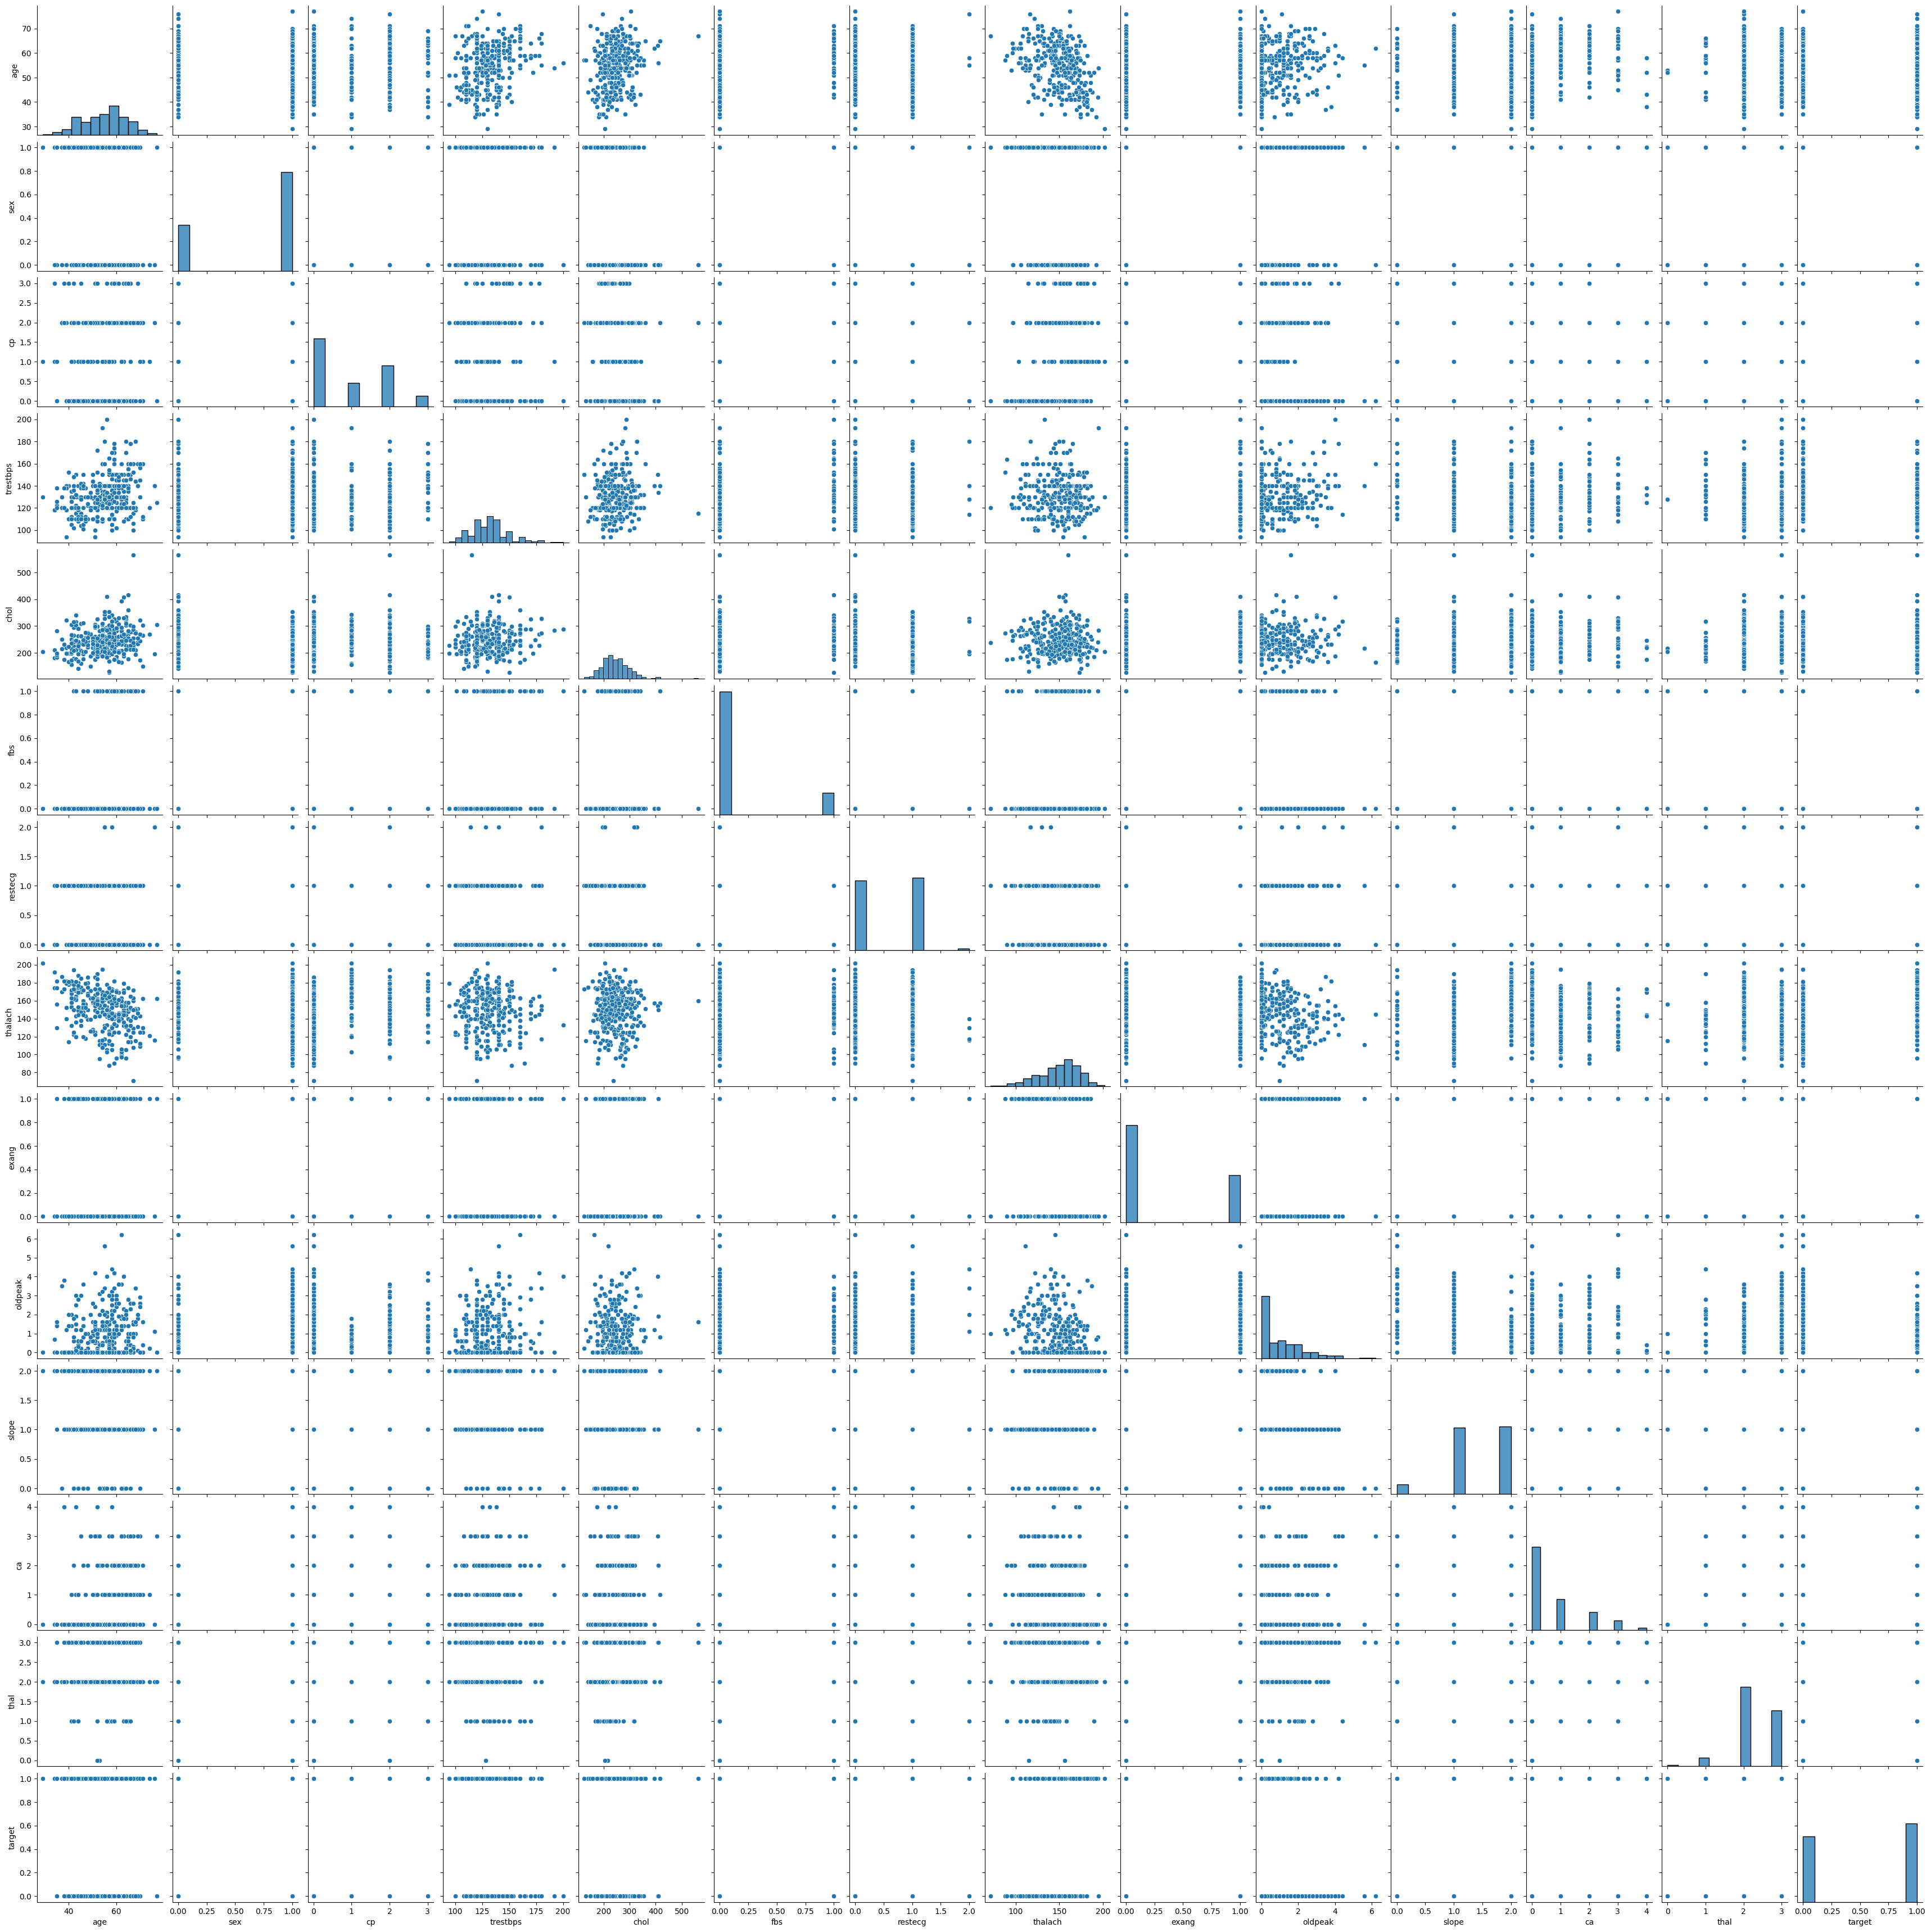

In [4]:
sns.pairplot(hd)

<Axes: xlabel='target', ylabel='count'>

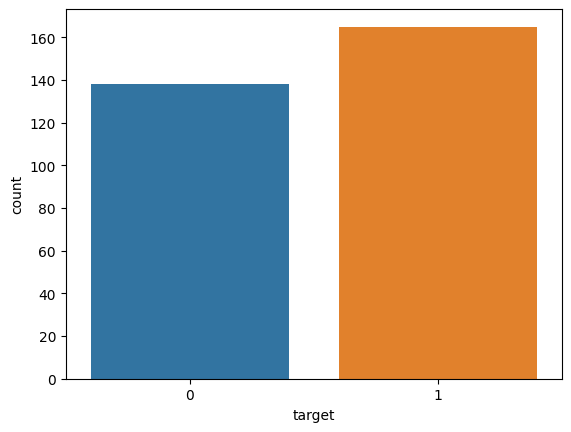

In [5]:
sns.countplot(x = 'target', data = hd)

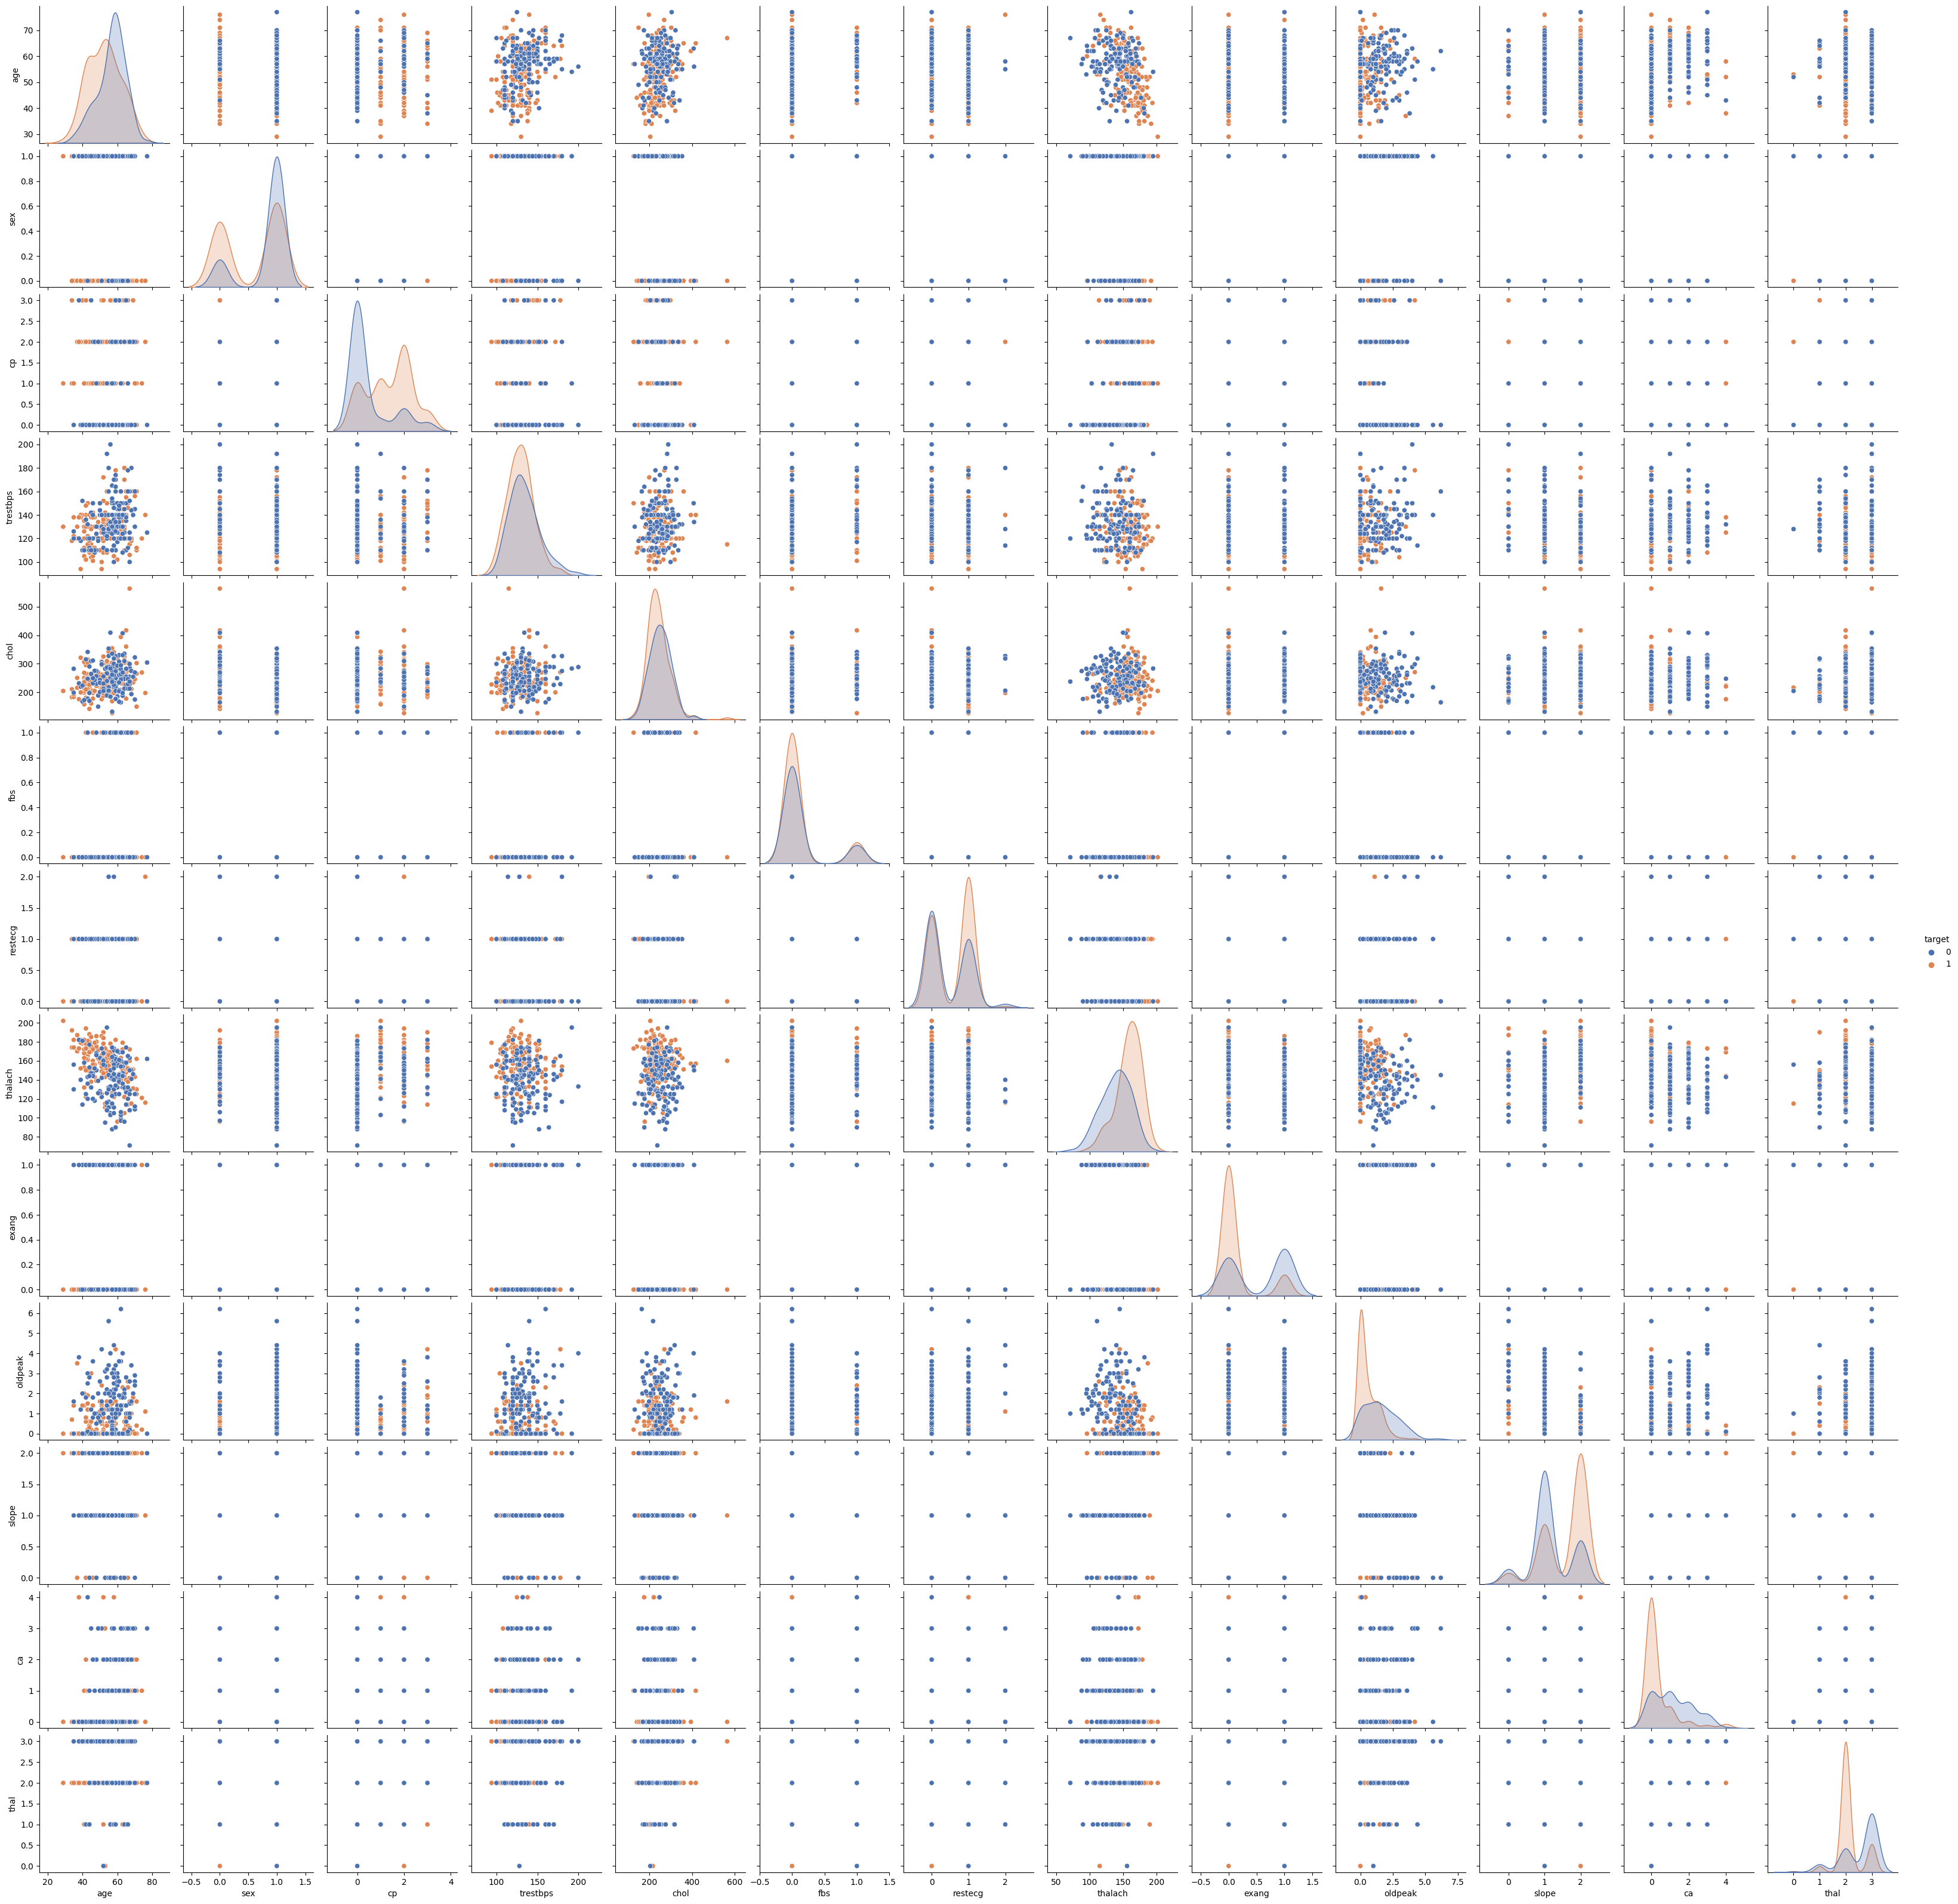

In [6]:
sns.pairplot(hd, hue = 'target', palette = 'deep')

In [7]:
selected_features = ['age',	'sex',	'cp',	'trestbps',	'chol',	'fbs',	'restecg',	'thalach',	'exang',	'oldpeak',	'slope',	'ca',	'thal']

In [8]:
X = hd[selected_features]
y = hd['target']

In [9]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.70833333, 1.        , 1.        , ..., 0.        , 0.        ,
        0.33333333],
       [0.16666667, 1.        , 0.66666667, ..., 0.        , 0.        ,
        0.66666667],
       [0.25      , 0.        , 0.33333333, ..., 1.        , 0.        ,
        0.66666667],
       ...,
       [0.8125    , 1.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ],
       [0.58333333, 1.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ],
       [0.58333333, 0.        , 0.33333333, ..., 0.5       , 0.25      ,
        0.66666667]])

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled, y, test_size = 0.2)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


In [12]:
predictor = tf.keras.models.Sequential()
predictor.add(tf.keras.layers.Dense(units = 100, activation = 'relu', input_shape = (13,)))
predictor.add(tf.keras.layers.Dropout(0.3))
predictor.add(tf.keras.layers.Dense(units = 50, activation = 'relu'))
predictor.add(tf.keras.layers.Dropout(0.3))
predictor.add(tf.keras.layers.Dense(units = 50, activation = 'relu'))
predictor.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [13]:
predictor.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = 'accuracy')

In [14]:
epochs_hist = predictor.fit(X_train,y_train,epochs = 50, batch_size = 125)

Epoch 1/50
2/2 [==============================] - 7s 18ms/step - loss: 0.6894 - accuracy: 0.5496
Epoch 2/50
2/2 [==============================] - 0s 12ms/step - loss: 0.6866 - accuracy: 0.5413
Epoch 3/50
2/2 [==============================] - 0s 10ms/step - loss: 0.6687 - accuracy: 0.5868
Epoch 4/50
2/2 [==============================] - 0s 10ms/step - loss: 0.6744 - accuracy: 0.5826
Epoch 5/50
2/2 [==============================] - 0s 10ms/step - loss: 0.6628 - accuracy: 0.6198
Epoch 6/50
2/2 [==============================] - 0s 9ms/step - loss: 0.6583 - accuracy: 0.6322
Epoch 7/50
2/2 [==============================] - 0s 13ms/step - loss: 0.6556 - accuracy: 0.6281
Epoch 8/50
2/2 [==============================] - 0s 10ms/step - loss: 0.6389 - accuracy: 0.6736
Epoch 9/50
2/2 [==============================] - 0s 14ms/step - loss: 0.6239 - accuracy: 0.6777
Epoch 10/50
2/2 [==============================] - 0s 9ms/step - loss: 0.6311 - accuracy: 0.7025
Epoch 11/50
2/2 [==============

In [15]:
epochs_hist2 = predictor.fit(X_test,y_test,epochs = 50, batch_size = 125)

Epoch 1/50
1/1 [==============================] - 0s 13ms/step - loss: 0.4225 - accuracy: 0.8033
Epoch 2/50
1/1 [==============================] - 0s 13ms/step - loss: 0.3882 - accuracy: 0.8033
Epoch 3/50
1/1 [==============================] - 0s 13ms/step - loss: 0.3771 - accuracy: 0.8361
Epoch 4/50
1/1 [==============================] - 0s 12ms/step - loss: 0.3727 - accuracy: 0.8033
Epoch 5/50
1/1 [==============================] - 0s 10ms/step - loss: 0.3588 - accuracy: 0.8361
Epoch 6/50
1/1 [==============================] - 0s 10ms/step - loss: 0.3485 - accuracy: 0.8033
Epoch 7/50
1/1 [==============================] - 0s 12ms/step - loss: 0.3381 - accuracy: 0.8689
Epoch 8/50
1/1 [==============================] - 0s 12ms/step - loss: 0.3738 - accuracy: 0.8525
Epoch 9/50
1/1 [==============================] - 0s 11ms/step - loss: 0.3471 - accuracy: 0.8197
Epoch 10/50
1/1 [==============================] - 0s 10ms/step - loss: 0.3296 - accuracy: 0.8361
Epoch 11/50
1/1 [============

In [16]:
evaluation = predictor.evaluate(X_test,y_test)
print('test accuracy:{}'.format(evaluation[1]))

2/2 [==============================] - 0s 9ms/step - loss: 0.2120 - accuracy: 0.9016
test accuracy:0.9016393423080444


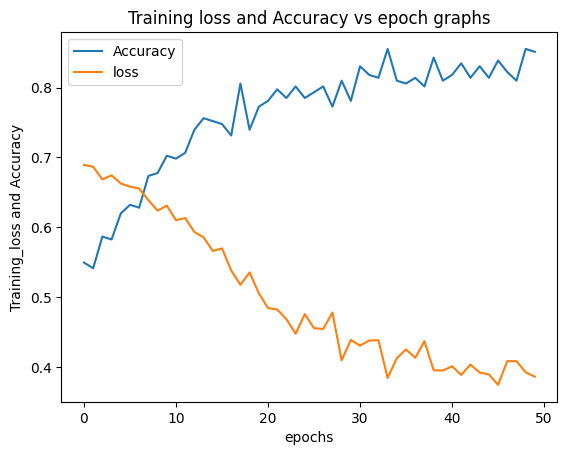

In [17]:
eh = epochs_hist.history['accuracy']
eh2 = epochs_hist.history['loss']
plt.plot(eh)
plt.plot(eh2)
plt.title('Training loss and Accuracy vs epoch graphs')
plt.xlabel('epochs')
plt.ylabel('Training_loss and Accuracy')
plt.legend({'Accuracy', 'loss'})

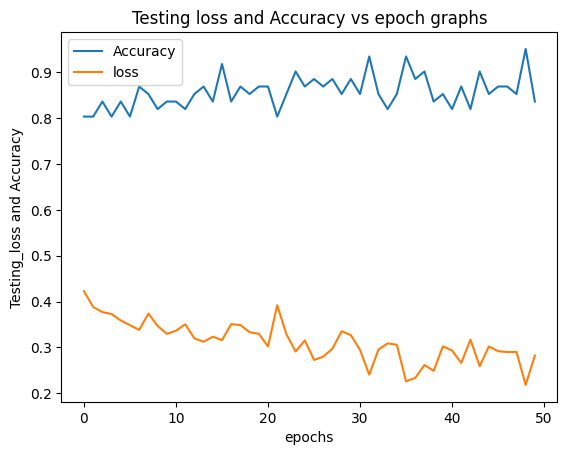

In [18]:
eh3 = epochs_hist2.history['accuracy']
eh4 = epochs_hist2.history['loss']
plt.plot(eh3)
plt.plot(eh4)
plt.title('Testing loss and Accuracy vs epoch graphs')
plt.xlabel('epochs')
plt.ylabel('Testing_loss and Accuracy')
plt.legend({'Accuracy', 'loss'})

In [19]:
y_predict = predictor.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [20]:
y_predict

array([[0.06790783],
       [0.586278  ],
       [0.9425169 ],
       [0.04709786],
       [0.01895456],
       [0.82599235],
       [0.38808683],
       [0.992661  ],
       [0.21170194],
       [0.02937072],
       [0.08674596],
       [0.9857124 ],
       [0.9545423 ],
       [0.35206258],
       [0.01432903],
       [0.82545364],
       [0.22224195],
       [0.03619677],
       [0.98412526],
       [0.04301712],
       [0.01223207],
       [0.04410594],
       [0.05540723],
       [0.24351388],
       [0.02206496],
       [0.38631508],
       [0.99864334],
       [0.9359979 ],
       [0.9994573 ],
       [0.0151796 ],
       [0.76995987],
       [0.9681249 ],
       [0.9982317 ],
       [0.07354492],
       [0.01598702],
       [0.47638997],
       [0.00859284],
       [0.9874467 ],
       [0.9638256 ],
       [0.3919278 ],
       [0.9983695 ],
       [0.84556633],
       [0.9874922 ],
       [0.01696407],
       [0.59630513],
       [0.01499319],
       [0.82557195],
       [0.203

In [21]:
y_predict = (y_predict > 0.5)

In [22]:
y_predict

array([[False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False]])

8/8 [==============================] - 0s 2ms/step


<Axes: >

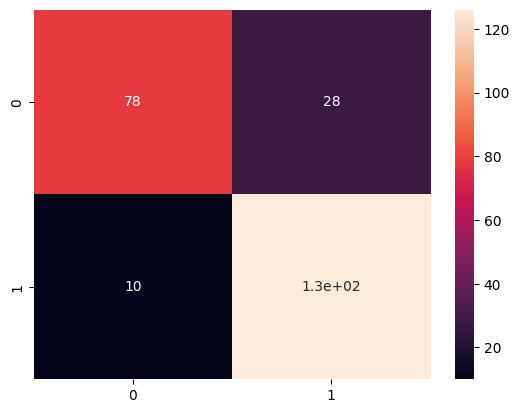

In [23]:
from sklearn.metrics import confusion_matrix
y_train_pred = predictor.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot = True)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_train_pred, y_train))

              precision    recall  f1-score   support

       False       0.74      0.89      0.80        88
        True       0.93      0.82      0.87       154

    accuracy                           0.84       242
   macro avg       0.83      0.85      0.84       242
weighted avg       0.86      0.84      0.85       242



<Axes: >

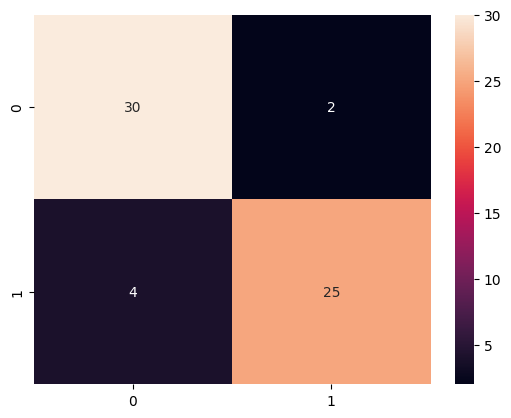

In [25]:
cm2 = confusion_matrix(y_test, y_predict)
sns.heatmap(cm2, annot = True)

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        32
           1       0.93      0.86      0.89        29

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

